# Central Limit Theorem (CLT)

The **Central Limit Theorem** explains the statistical properties of the sample mean ($\bar{X}_n$) when $n$ independent and identically distributed (i.i.d.) random variables ($X_1, X_2, \dots, X_n$) are drawn from a population with a finite mean ($\mu$) and finite variance ($\sigma^2$).


For a population where:
- The mean is $\mathbb{E}[X_n] = \mu$, and
- The variance is $\text{Var}(X_n) = \sigma^2$,

The sample mean $\bar{X}_n$ is defined as:

$$
\bar{X}_n = \frac{1}{n} \sum_{k=1}^n X_k
$$

##### Properties of $\bar{X}_n$:
1. Expected Value ($\mathbb{E}[\bar{X}_n]$):
   $$\mathbb{E}[\bar{X}_n] = \mu$$
   The expected value of the sample mean is equal to the population mean.

2. Variance ($\text{Var}(\bar{X}_n)$):
   $$
   \text{Var}(\bar{X}_n) = \frac{\sigma^2}{n}
   $$
   The variance of the sample mean decreases as the sample size $n$ increases. Larger samples provide more precise estimates.


---
#### **CLT statement**: 
For large values of $n$, the sample mean $\bar{X}_n$ is approximately **normally distributed**, regardless of the original population's distribution :

$$
\bar{X}_n \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right) \quad \text{as } n \to \infty
$$

This means that $\bar{X}_n$ follows a **normal distribution** with:
- Mean: $\mu$ (the population mean)
- Variance: $\frac{\sigma^2}{n}$ (the population variance divided by the sample size).



---

### Intuition

1. Population Shape Doesn't Matter:
   - Even if the original population $X_k$ is not normal (e.g., highly skewed, uniform, etc.), the distribution of $\bar{X}_n$ will approach a normal distribution due to the CLT.

2. Larger Sample Size = Better Approximation:
   - The approximation of $\bar{X}_n \sim \mathcal{N}(\mu, \sigma^2 / n)$ improves as $n$ increases.



Further explanations : https://www.probabilitycourse.com/chapter7/7_1_2_central_limit_theorem.php

Youtube video : https://youtu.be/YAlJCEDH2uY?si=fm4lH1vTmX4-SWbV

---

### Applications

The CLT is the foundation of statistical inference.

In Machine learning, it is used to evaluate the performance of models.  
For example, when comparing the performance of different models, you can use the CLT to calculate the standard error of the estimate, which helps to determine if the difference in performance is statistically significant.


### Exercise 1 : Experiment the CLT

- Generate a population which is not normally distributed. Use numpy documentation to use the distribution you want : https://numpy.org/doc/2.1/reference/random/index.html

- Observe the distribution of your generated data (please use seaborn instead of matplotlib for graphics : https://seaborn.pydata.org/generated/seaborn.histplot.html)

- Create a code/procedure to observe the Central Limit Theorem

In [80]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sample = []

n = 10
p_array = [0.1, 0.5, 0.8]
sample_sizes = [2, 5, 10, 50, 100, 1000]


binomial_values = list(range(n + 1))

def binomial_pdf(mean, std_dev, x):
    exp = np.e ** (- ((x - mean)**2) / (2 * (std_dev**2)))
    fraction = 1 / (std_dev * np.sqrt(2 * np.pi))
    return fraction * exp




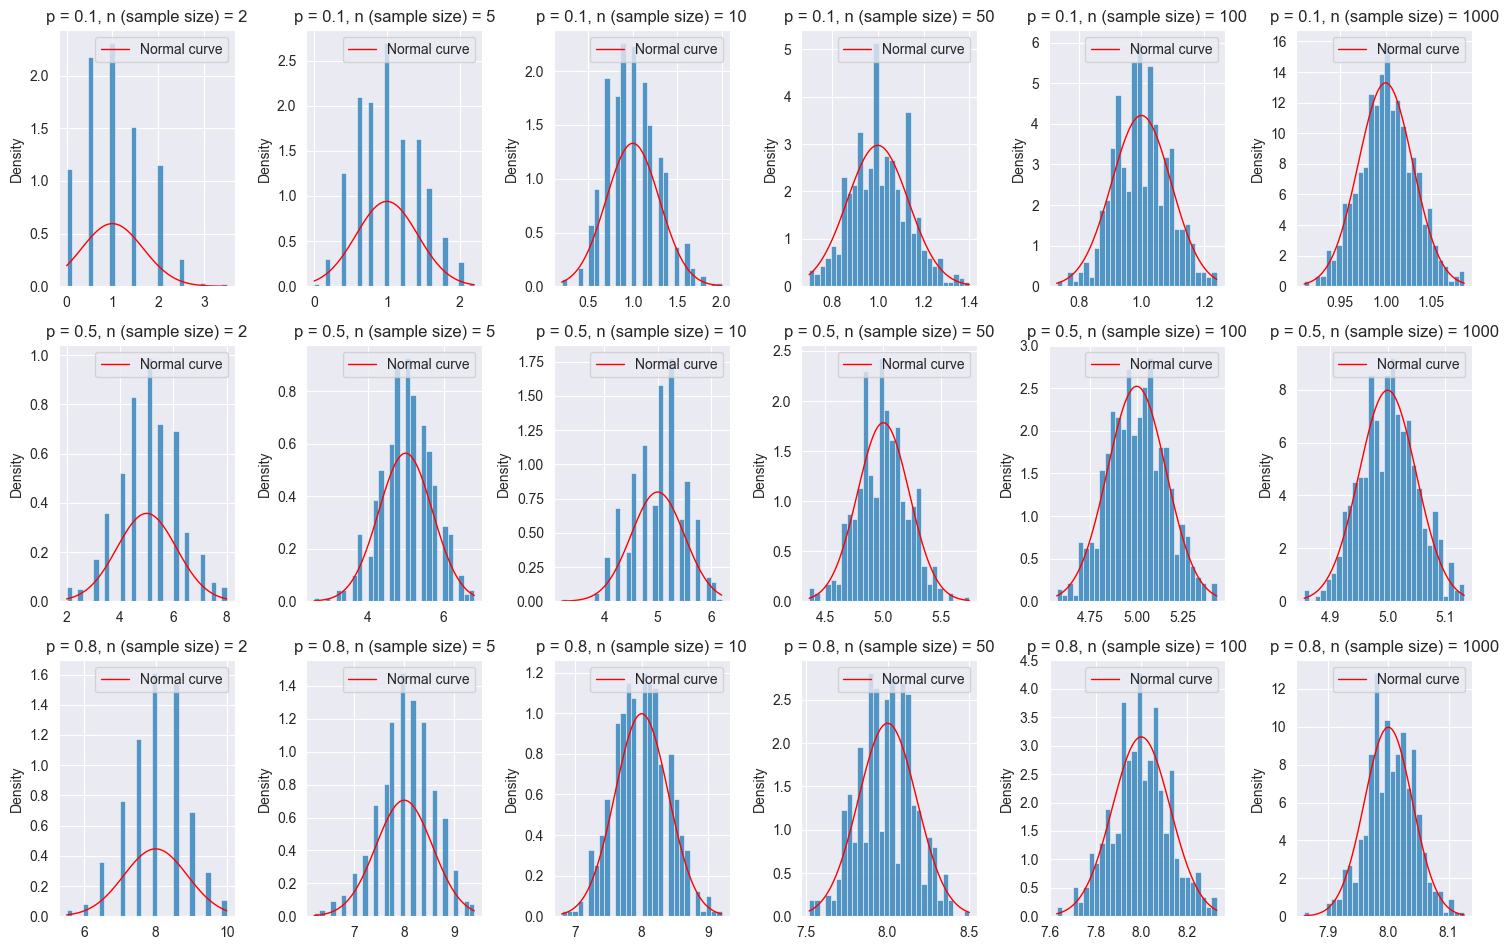

In [81]:
fig, axes = plt.subplots(len(p_array), len(sample_sizes), figsize=(15,10))

for i in range(len(p_array)):
    p = p_array[i]
    for j in range(len(sample_sizes)):
        num_samples = 500

        sample_size = sample_sizes[j]

        sample_means = [
            np.mean(np.random.binomial(n, p, sample_size))
            for k in range(num_samples)
        ]

        sample_mean = n * p
        sample_std_dev = np.sqrt((n * p * (1 - p)) / sample_size)
        x = np.linspace(min(sample_means), max(sample_means), 100)
        normal_curve = [binomial_pdf(sample_mean, sample_std_dev, x_i) for x_i in x]

        ax = axes[i, j]
        sns.histplot(sample_means, kde=False, bins=30, stat='density', ax=ax)
        ax.plot(x, normal_curve, color='red', linewidth = 1, label='Normal curve')

        ax.set_title(f"p = {p}, n (sample size) = {sample_size}")
        ax.legend()


plt.tight_layout(rect=[0, 0, 1,0.96])
plt.show()

---
# Law of Large Numbers (LLN)

The **Law of Large Numbers (LLN)** in probability theory states that as the sample size increases, the sample average approaches the population mean. 

It has two main forms: **Weak LLN** and **Strong LLN**.



### Weak Law of Large Numbers (WLLN)

The sample mean **converges in probability** to the population mean $\mu$ as the sample size $n$ increases:

$$
\overline{X}_n \xrightarrow{P} \mu, \quad \text{as } n \to \infty.
$$

This means that for any small positive number $\varepsilon > 0$ :

$$
\lim_{n \to \infty} P(|\overline{X}_n - \mu| > \varepsilon) = 0.
$$

#### Intuition

The probability that the sample average $\overline{X}_n$ differs from the true population mean $\mu$ by more than a small margin $\varepsilon$ becomes negligible as  $n \to \infty$. 

In practical terms, the sample averages get closer to the true mean as the sample size increases, though deviations may occasionally occur.





### Strong Law of Large Numbers (SLLN)

The strong LLN strengthens this result by stating that the sample mean **"almost surely converges"** to the population mean $\mu$:

$$
\overline{X}_n \xrightarrow{a.s.} \mu, \quad \text{as } n \to \infty.
$$

i.e.

$$
P\Big(\lim_{n \to \infty} \overline{X}_n = \mu\Big) = 1.
$$

#### Intuition

While the weak LLN suggests that  $\overline{X}_n$  is "very likely" to approach  $\mu$ , the strong LLN guarantees that  $\overline{X}_n$  converges to  $\mu$  with probability 1, meaning the deviations between  $\overline{X}_n$  and  $\mu$ "disappear almost surely".

---

## Importance of LLN in Machine Learning

1. **Generalization**: The LLN ensures that as we gather more data, sample averages (e.g., empirical loss, accuracy) converge to the true population averages. This helps assess a model's generalization ability.

2. **Monte Carlo Methods**: Many ML algorithms rely on sampling techniques (e.g., stochastic gradient descent) to estimate parameters. LLN guarantees these estimations stabilize with more samples, leading to reliable outcomes.


In summary, the **Law of Large Numbers** provides theoretical confidence in ML when working with finite datasets, ensuring that performance evaluations and statistical estimates stabilize and reflect the true system's behavior as data size increases.

Link for further explanations : https://www.probabilitycourse.com/chapter7/7_1_1_law_of_large_numbers.php

Youtube Video : https://www.youtube.com/watch?v=ycuPP72_DVU 


### Exercise 2: Observe the Law of Large Numbers


- Generate a population of any distribution of your choice using NumPy (https://numpy.org/doc/2.1/reference/random/index.html).
- Find a way to experiment the LLN. 
Hint, you will need to randomly draw sub-samples from the population you generated. Ask yourself, what should you do with these sub-samples ?
- Use Seaborn to visualize the convergence (https://seaborn.pydata.org/generated/seaborn.lineplot.html).


#### Using the Poisson Distribution

Lamdas:  [72, 43, 14]

For lambda = 72
	Difference between population mean and sample mean:  8.0
	Difference between population mean and sample mean:  -6.5
	Difference between population mean and sample mean:  -1.4200000000000017
	Difference between population mean and sample mean:  0.8700000000000045
	Difference between population mean and sample mean:  0.24899999999999523
	Difference between population mean and sample mean:  0.06449999999999534

For lambda = 43
	Difference between population mean and sample mean:  -1.0
	Difference between population mean and sample mean:  -2.299999999999997
	Difference between population mean and sample mean:  -0.240000000000002
	Difference between population mean and sample mean:  0.07000000000000028
	Difference between population mean and sample mean:  0.20900000000000318
	Difference between population mean and sample mean:  0.0031999999999996476

For lambda = 14
	Difference between population mean and sample mean:  -4.0
	Difference between populat

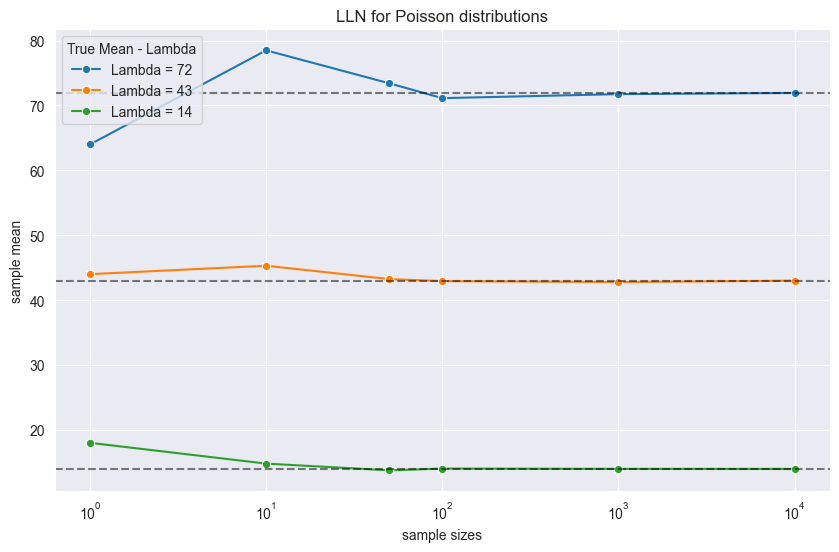

In [82]:
lambda_array = [np.random.randint(1, 100) for _ in range(3)]
sample_sizes = [1, 10, 50, 100, 1000, 10000]

sns.set_style('darkgrid')

plt.figure(figsize=(10, 6))

print('Lamdas: ', lambda_array)


for i in range(len(lambda_array)):
    lam = lambda_array[i]
    print(f'\nFor lambda = {lam}')
    sample_means = []

    for j in range(len(sample_sizes)):
        sample_size = sample_sizes[j]

        sample_mean = np.random.poisson(lam, sample_size).mean()
        sample_means.append(sample_mean)
        print('\tDifference between population mean and sample mean: ', lam - sample_mean)
        sample_std_dev = lam

    sns.lineplot(x=sample_sizes, y=sample_means, marker="o", label=f'Lambda = {lam}')
    plt.axhline(y=lam, linestyle="dashed", color="black", alpha=0.5)

plt.xscale("log")
plt.xlabel("sample sizes")
plt.ylabel("sample mean")
plt.title("LLN for Poisson distributions")
plt.legend(title="True Mean - Lambda")
plt.show()

We can clearly see that for increasing values of the sample size, the mean of each distribution converges to the true mean $\lambda$